In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("KaggleV2-May-2016.csv")

In [46]:
print("Data Shape:", df.shape)
print(df.head())
print(df.info())
print(df['No-show'].value_counts())


Data Shape: (110527, 14)
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0  

In [47]:
df.columns = df.columns.str.lower().str.replace('-', '_')

In [48]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [49]:
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0})

In [50]:
df['waiting_days'] = (df['appointmentday'] - df['scheduledday']).dt.days

In [51]:
df['weekday'] = df['appointmentday'].dt.day_name()

In [52]:
df = df.drop(columns=['patientid', 'appointmentid'])

In [53]:
df = pd.get_dummies(df, columns=['gender', 'weekday'], drop_first=True)

In [54]:
# Encode 'neighbourhood' as numbers
df['neighbourhood'] = df['neighbourhood'].astype('category').cat.codes

# Now define X and y
X = df.drop(columns=['no_show', 'scheduledday', 'appointmentday'])
y = df['no_show']


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [57]:
y_pred = model.predict(X_test)

In [58]:
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 79.93 %

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     17669
           1       0.00      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106



c:\Users\SANJANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SANJANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\SANJANA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

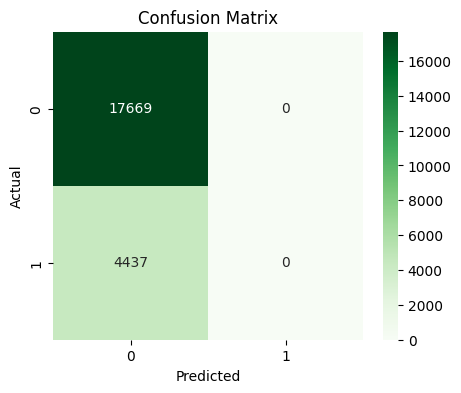

In [59]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [60]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

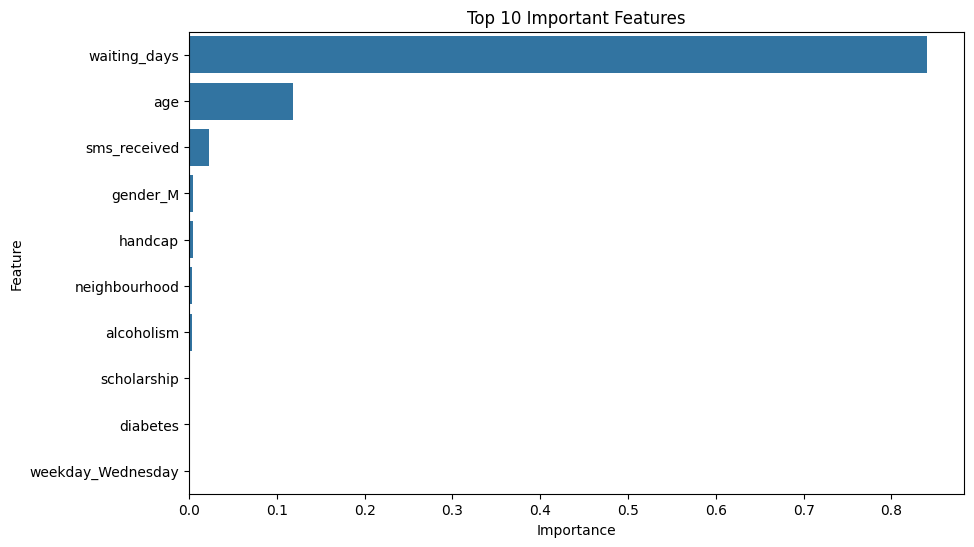

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features")
plt.show()

In [62]:
df.to_csv("cleaned_no_show_data.csv", index=False)
print("Cleaned dataset exported successfully: cleaned_no_show_data.csv")

Cleaned dataset exported successfully: cleaned_no_show_data.csv


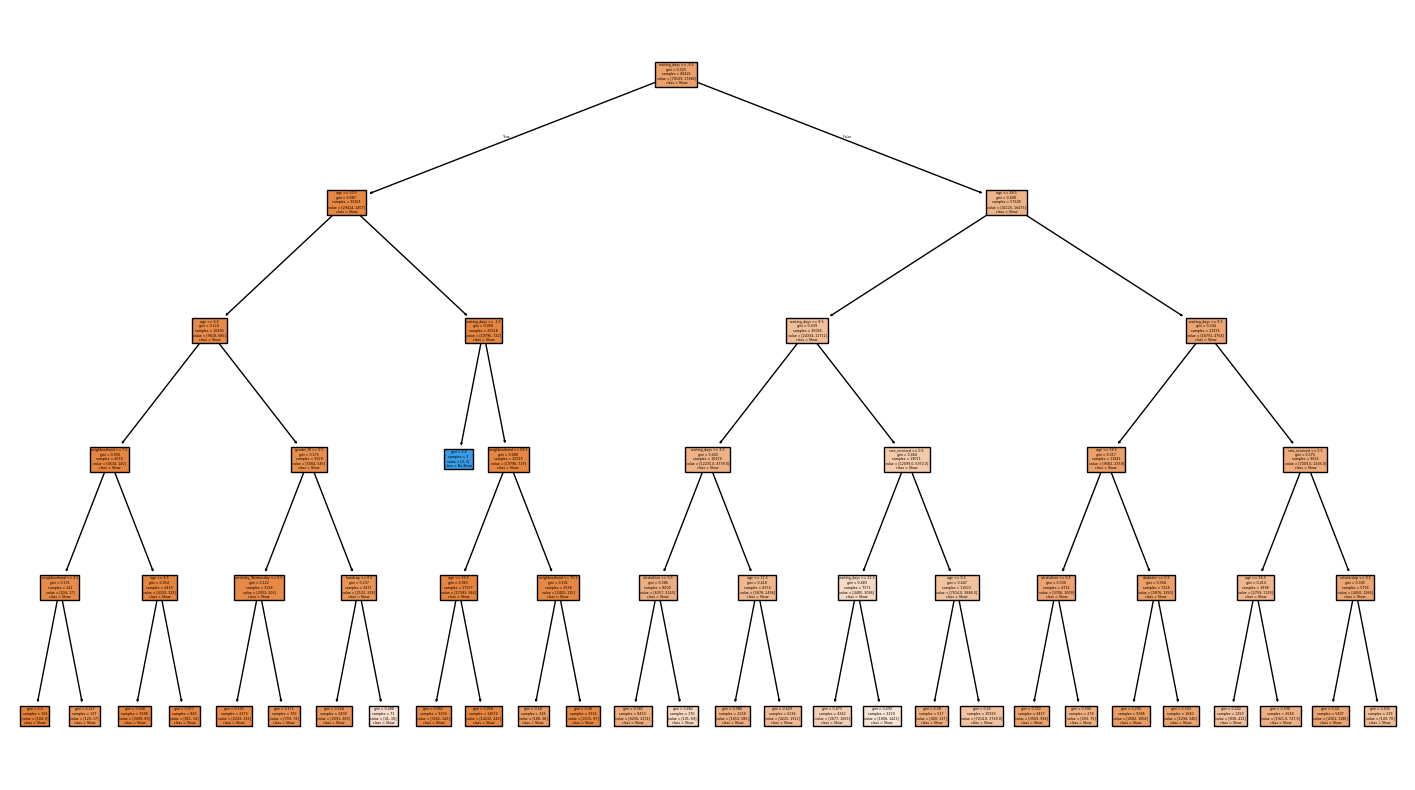

In [63]:
from sklearn import tree
plt.figure(figsize=(18,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Show', 'No-Show'])
plt.show()
